In [1]:
#   Name: Teresa Ferrill
#   Date: 05/17/2020
# Course: DSC540-T302 Data Preparation
# Term Project: Milestone Four - Gun Violence

Connecting to an API/Pulling in the Data and Cleaning/Formatting

Perform at least 5 data transformation and/or cleansing steps to your API data. For example:
  
Note - these transformations/cleasing steps occur throughout the notebook


> 1. Format data into a more readable format        
>> --Took Date column and broke it into thee columns (Month, Day, Year) so that it can be used with other data sources sorted by Year     
> 2. Replace Headers  
>> --Added Index column header     
>> --Updated column headers for data columns    
> 3. Find duplicates    
>> --Ran query to find duplicates (no duplicates found)
> 4. Identify outliers and bad data     
>> --Checked for NULL or NaN values within the data, deleted 2 rows with NaN values               
>> --Ran Histogram on Injured and Killed columns in order to determine if there were any negative values
> 5. Fix casing or inconsistent values     
>> --Deleted unnecessary column from table     
>> --Verified State, City, Month, Day, Year columns for inconsistent values    
>> --Updated State column to upper case state abbreviation

__Set up for Notebook activities, including import statements and establishment of custom functions__

In [2]:
# import libraries to support notebook processing

# support for BeautifulSoup
from bs4 import BeautifulSoup
# support for URL request and open
from urllib.request import Request, urlopen
# support for pandas DataFrame
import pandas as pd
# support for histogram plots
import matplotlib.pyplot as plt
# support for JSON processing
import json 
# support for operation systems functions
import os 

In [3]:
# using Kaggle API source
# install Kaggle for API support - if Kaggle has already been installed, 
# libraries will state 'Requirement already satisfied'

# install Kaggle libraries
!pip install kaggle

In [4]:
# function to update State column to capitalized State abbreviation 
def updateState(df):
    df['State'] = df.State.replace('Indiana', 'IN')
    df['State'] = df.State.replace('Wisconsin', 'WI')
    df['State'] = df.State.replace('New York', 'NY')
    df['State'] = df.State.replace('Virginia', 'VA')    
    df['State'] = df.State.replace('North Carolina', 'NC')
    df['State'] = df.State.replace('Florida', 'FL')
    df['State'] = df.State.replace('Tennessee', 'TN')
    df['State'] = df.State.replace('Maryland', 'MD')
    df['State'] = df.State.replace('Massachusetts', 'MA')
    df['State'] = df.State.replace('Mississippi', 'MS')
    df['State'] = df.State.replace('California', 'CA')
    df['State'] = df.State.replace('Mississippi', 'MS')
    df['State'] = df.State.replace('Texas', 'TX')    
    df['State'] = df.State.replace('Michigan', 'MI')
    df['State'] = df.State.replace('South Carolina', 'SC')
    df['State'] = df.State.replace('South Dakota', 'SD')
    df['State'] = df.State.replace('Illinois', 'IL')
    df['State'] = df.State.replace('Louisiana', 'LA')
    df['State'] = df.State.replace('Kentucky', 'KY')
    df['State'] = df.State.replace('Georgia', 'GA')
    df['State'] = df.State.replace('Pennsylvania', 'PA')    
    df['State'] = df.State.replace('Missouri', 'MO')
    df['State'] = df.State.replace('New Mexico', 'NM')
    df['State'] = df.State.replace('Ohio', 'OH')
    df['State'] = df.State.replace('District of Columbia', 'DC')
    df['State'] = df.State.replace('Washington', 'WA')
    df['State'] = df.State.replace('Vermont', 'VT')
    df['State'] = df.State.replace('West Virginia', 'WV')
    df['State'] = df.State.replace('Iowa', 'IA')
    df['State'] = df.State.replace('Minnesota', 'MN')
    df['State'] = df.State.replace('Alabama', 'AL')
    df['State'] = df.State.replace('New Jersey', 'NJ')
    df['State'] = df.State.replace('Arkansas', 'AR')
    df['State'] = df.State.replace('Arizona', 'AZ')
    df['State'] = df.State.replace('Oklahoma', 'OK')
    df['State'] = df.State.replace('Kansas', 'KS')
    df['State'] = df.State.replace('Nevada', 'NV')
    df['State'] = df.State.replace('Oregon', 'OR')
    df['State'] = df.State.replace('Nebraska', 'NE')
    df['State'] = df.State.replace('Colorado', 'CO')
    df['State'] = df.State.replace('Connecticut', 'CT')
    df['State'] = df.State.replace('Delaware', 'DE')

In [5]:
# get the current working directory
os.getcwd()

'C:\\Users\\14023\\DSC540\\TermProject'

In [6]:
# change directory to .kaggle
os.chdir(".kaggle")
# prepare data for input to kaggle.json file, username and API key information
data = {"username":"teresaferrill","key":"49b613bbb9cda757a0bf942e8243bb76"}
# open kaggle.json file, write data with username and API key information to the file
with open('kaggle.json', 'w') as outfile:
    json.dump(data, outfile)
# change directory back to original folder    
os.chdir("..\\")
# verify current working directory, should match above
os.getcwd()

'C:\\Users\\14023\\DSC540\\TermProject'

In [7]:
# import the Kaggle API library to support authentication
from kaggle.api.kaggle_api_extended import KaggleApi
# establish Kaggle API
api = KaggleApi(data)
# authenticate to Kaggle site
api.authenticate()
# download the gun violence database from Kaggle
!kaggle datasets download -d gunviolencearchive/gun-violence-database


  0%|          | 0.00/119k [00:00<?, ?B/s]
100%|##########| 119k/119k [00:00<00:00, 332kB/s]
100%|##########| 119k/119k [00:00<00:00, 330kB/s]


In [8]:
# import library to support zip packages
from shutil import unpack_archive
# unpack the gun violence database download
unpack_archive('gun-violence-database.zip')

In [9]:
# read the mass shootings file
data = pd.read_csv('mass_shootings_all.csv')
# view head of dataframe
data.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"November 26, 2016",Illinois,Chicago,8800 block of South Exchange Avenue,1,5,NaN
1,"November 25, 2016",Louisiana,New Orleans,Magnolia and Felicity Street,0,4,NaN
2,"November 24, 2016",Kentucky,Louisville,4501 W Broadway,2,5,NaN
3,"November 24, 2016",New York,Albany,77 Central Avenue,1,3,NaN
4,"November 23, 2016",Mississippi,Olive Branch,928 Cross Road,0,4,NaN


In [10]:
# view the data types of the DataFrame
data.dtypes

Incident Date      object
State              object
City Or County     object
Address            object
# Killed            int64
# Injured           int64
Operations        float64
dtype: object

__Delete unnecessary Operations column__

In [11]:
# find the unique valures of the Operations column
data.Operations.unique()

array([nan])

In [13]:
# remove Operations column - no rows contain any data, column is unnecessary
del data['Operations']

In [15]:
# view number of rows and columns of DataFrame
data.shape

(500, 6)

__Added Index column header and Updated Column Headers__

In [16]:
# added header to row index column
data.index.name = 'Index'
# update column headers of DataFrame
data = data.rename(columns = {'Incident Date':'Date', 'City Or County':'City', '# Killed':'Killed', '# Injured':'Injured'})

In [17]:
# review DataFrame rows
data.head()

,Date,State,City,Address,Killed,Injured
Index,,,,,,
0,"November 26, 2016",Illinois,Chicago,8800 block of South Exchange Avenue,1,5
1,"November 25, 2016",Louisiana,New Orleans,Magnolia and Felicity Street,0,4
2,"November 24, 2016",Kentucky,Louisville,4501 W Broadway,2,5
3,"November 24, 2016",New York,Albany,77 Central Avenue,1,3
4,"November 23, 2016",Mississippi,Olive Branch,928 Cross Road,0,4


__Verify State column values, updated values to upper case state abbreviations__

In [18]:
# identify unique state names
data.State.unique()

array(['Illinois', 'Louisiana', 'Kentucky', 'New York', 'Mississippi',
       'Florida', 'Tennessee', 'California', 'Texas', 'Connecticut',
       'Missouri', 'Washington', 'South Carolina', 'Pennsylvania',
       'Arkansas', 'Ohio', 'Maryland', 'Georgia', 'Virginia', 'Oklahoma',
       'Alabama', 'Michigan', 'Minnesota', 'North Carolina', 'Indiana',
       'District of Columbia', 'New Jersey', 'Massachusetts', 'Wisconsin',
       'New Mexico', 'Colorado', 'Arizona', 'Nevada', 'Oregon', 'Kansas',
       'Delaware', 'West Virginia', 'Nebraska', 'Iowa', 'South Dakota',
       'Vermont'], dtype=object)

In [19]:
# update state values to upper case two digit abbreviations 
updateState(data)

In [20]:
# verify update to State column
data.State.unique()

array(['IL', 'LA', 'KY', 'NY', 'MS', 'FL', 'TN', 'CA', 'TX', 'CT', 'MO',
       'WA', 'SC', 'PA', 'AR', 'OH', 'MD', 'GA', 'VA', 'OK', 'AL', 'MI',
       'MN', 'NC', 'IN', 'DC', 'NJ', 'MA', 'WI', 'NM', 'CO', 'AZ', 'NV',
       'OR', 'KS', 'DE', 'WV', 'NE', 'IA', 'SD', 'VT'], dtype=object)

In [21]:
# review first 10 rows of DataFrame
data.head()

,Date,State,City,Address,Killed,Injured
Index,,,,,,
0,"November 26, 2016",IL,Chicago,8800 block of South Exchange Avenue,1,5
1,"November 25, 2016",LA,New Orleans,Magnolia and Felicity Street,0,4
2,"November 24, 2016",KY,Louisville,4501 W Broadway,2,5
3,"November 24, 2016",NY,Albany,77 Central Avenue,1,3
4,"November 23, 2016",MS,Olive Branch,928 Cross Road,0,4


__Add Month, Day, and Year columns as copy of Data column, separate the values to Month, Day, and Year__

In [22]:
# review data types of DataFrame
data.dtypes

Date       object
State      object
City       object
Address    object
Killed      int64
Injured     int64
dtype: object

In [23]:
# update Killed and Injured columns to string data type
data.Killed = data.Killed.astype(str)
data.Injured = data.Injured.astype(str)
# add columns for month, day, and year
data['Month'] = data['Date']
data['Day'] = data['Date']
data['Year'] = data['Date']
# view data types of Data Frame
data.dtypes

Date       object
State      object
City       object
Address    object
Killed     object
Injured    object
Month      object
Day        object
Year       object
dtype: object

In [24]:
# loop through DataFrame and update new columns with corresponding date portion
# split the initial value on space and store the date portion appropriately
for index, row in data.iterrows():
    # split Date value on spaces, add to date list
    splitDate = row['Date'].split()
    
    # update Month column with 1st value in the string (Month)
    row['Month'] = splitDate[0]
   
    # update Day column with 2nd value in the string (Day) and remove the comma
    row['Day'] = splitDate[1][:-1]
    
    # update Year column with 3rd value in the string (Year)
    row['Year'] = splitDate[2]
    
# verify resulting DataFrame
data

,Date,State,City,Address,Killed,Injured,Month,Day,Year
Index,,,,,,,,,
0,"November 26, 2016",IL,Chicago,8800 block of South Exchange Avenue,1,5,November,26,2016
1,"November 25, 2016",LA,New Orleans,Magnolia and Felicity Street,0,4,November,25,2016
2,"November 24, 2016",KY,Louisville,4501 W Broadway,2,5,November,24,2016
3,"November 24, 2016",NY,Albany,77 Central Avenue,1,3,November,24,2016
4,"November 23, 2016",MS,Olive Branch,928 Cross Road,0,4,November,23,2016
...,...,...,...,...,...,...,...,...,...
495,"July 25, 2015",VA,Hopewell,500 block of N. 7th Ave,0,4,July,25,2015
496,"July 24, 2015",PA,Erie,200 block of West 29th Street,2,4,July,24,2015
497,"July 23, 2015",LA,Lafayette,3141 Johnson Street,3,9,July,23,2015


In [26]:
# reset Killed and Injured columns to Integer data type
data.Killed = data.Killed.astype(int)
data.Injured = data.Injured.astype(int)
# view first part of DataFrame
data.head()

,Date,State,City,Address,Killed,Injured,Month,Day,Year
Index,,,,,,,,,
0,"November 26, 2016",IL,Chicago,8800 block of South Exchange Avenue,1,5,November,26,2016
1,"November 25, 2016",LA,New Orleans,Magnolia and Felicity Street,0,4,November,25,2016
2,"November 24, 2016",KY,Louisville,4501 W Broadway,2,5,November,24,2016
3,"November 24, 2016",NY,Albany,77 Central Avenue,1,3,November,24,2016
4,"November 23, 2016",MS,Olive Branch,928 Cross Road,0,4,November,23,2016


In [27]:
# verify data types of DataFrame
data.dtypes

Date       object
State      object
City       object
Address    object
Killed      int32
Injured     int32
Month      object
Day        object
Year       object
dtype: object

__Remove any duplicate rows from DataFrame__

In [28]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = data[data.duplicated()]

# print results
print("Duplicate Rows except based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except based on all columns are :
Empty DataFrame
Columns: [Date, State, City, Address, Killed, Injured, Month, Day, Year]
Index: []


> The resulting empty DataFrame indicates there are no duplicates in the table DataFrame.

__Determine if there are any NaN values within the DataFrame, delete if found__

In [29]:
# determine where NaN values exist

# notnull().sum() method counts the rows within the dataset that do not contain any null values
data.notnull().sum()

Date       500
State      500
City       500
Address    498
Killed     500
Injured    500
Month      500
Day        500
Year       500
dtype: int64

In [31]:
# only two rows contain null addresses, can delete without impact to analysis
# delete the rows with null or NaN value for Address
data = data[data['Address'].notna()]

In [32]:
# verify delete of null Address rows
data.notnull().sum()

Date       498
State      498
City       498
Address    498
Killed     498
Injured    498
Month      498
Day        498
Year       498
dtype: int64

__Generate Histogram to verify if any outliers exist__

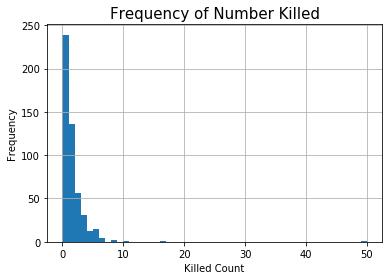

In [33]:
# generate histogram - to determine if there are any negative numbers included in the rows
# use matplotlib to generate plots
import matplotlib.pyplot as plt
plt.title("Frequency of Number Killed", fontsize=15)
# identify column to plot
plt.hist(data['Killed'], bins=50)
# show grid
plt.grid(True)
# print
# add x label title
plt.xlabel('Killed Count')
# add y label title
plt.ylabel('Frequency')
plt.show()

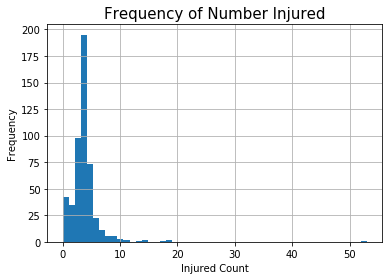

In [34]:
# generate histogram of number injured - to determine if there are any negative numbers included in the rows
# use matplotlib to generate plots
import matplotlib.pyplot as plt
plt.title("Frequency of Number Injured", fontsize=15)
# identify column to plot
plt.hist(data['Injured'], bins=50)
# show grid
plt.grid(True)
# print
# add x label title
plt.xlabel('Injured Count')
# add y label title
plt.ylabel('Frequency')
plt.show()

> Histograms show no negative values for injured or killed     
> Being mass violence, it is conceivable that the higher numbers within the histograms are valid     
> There are no outliers within the Killed and Injured values within the DataFrame    

> References:   

>> Kaggle. (2020). _Gun Violence Database_ Retrieved from Kaggle: https://www.kaggle.com/gunviolencearchive/undefined